# Gráfico de Barras
Este notebook tiene como intención mostrar varias gráficas para visualizar la comparación entre los valores promedio de las señales asociadas con un eje específico dentro de un nivel de White Noise clasificándose por el estado de la estructura.

## Importaciones

In [1]:
from google.colab import drive
from os import listdir
from os.path import isfile, join
from scipy.io import loadmat 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

## Obtención de Datos

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_datos_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/DATOS'
dataset_images_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/IMAGES_FOLDER'

dataset_datos_files = [dataset_datos_dir+'/'+filename for filename in listdir(dataset_datos_dir) if isfile(join(dataset_datos_dir, filename))]

In [4]:
datos_wn_05 = []
datos_wn_1 = []
datos_wn_2 = []
datos_wn_3 = []

for filename in listdir(dataset_datos_dir):
  if isfile(join(dataset_datos_dir, filename)):
    nombre_archivo = filename.split('.')[0]
    if (nombre_archivo.split('_')[2] == '05A'):
      datos_wn_05.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '1A'):
      datos_wn_1.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '2A'):
      datos_wn_2.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '3A'):
      datos_wn_3.append(dataset_datos_dir + '/' + filename)

In [5]:
def separar_por_estado(arreglo):

  estado_1 = []
  estado_2 = []
  estado_3 = []
  estado_4 = []

  for direccion in arreglo:
    nombre_archivo = direccion.split('/')[4].split('.')[0]
    estado = nombre_archivo.split('_')[0]
    if (estado == '1'):
      estado_1.append(direccion)
    elif (estado == '2'):
      estado_2.append(direccion)
    elif (estado == '3'):
      estado_3.append(direccion)
    elif (estado == '4'):
      estado_4.append(direccion)

  return {1: estado_1, 2: estado_2, 3: estado_3, 4: estado_4}

In [6]:
datos_wn_05_estados = separar_por_estado(datos_wn_05)
datos_wn_1_estados = separar_por_estado(datos_wn_1)
datos_wn_2_estados = separar_por_estado(datos_wn_2)
datos_wn_3_estados = separar_por_estado(datos_wn_3)

diccionario_datos = {
                     'wn_05': datos_wn_05_estados,
                     'wn_1': datos_wn_1_estados,
                     'wn_2': datos_wn_2_estados,
                     'wn_3': datos_wn_3_estados 
                    }

In [7]:
indices_X = [0, 3, 6, 9, 12, 15, 18, 21]
indices_Y = [1, 4, 7, 10, 13, 16, 19, 22]
indices_Z = [2, 5, 8, 11, 14, 17, 20, 23]

## Gráficas de Barras

In [8]:
font_title = {'family': 'monospace',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

font_label = {'family': 'monospace',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }

In [17]:
def configurar_datos_XYZ(conjunto_wn,
                         estado_n,
                         indices_X,
                         indices_Y,
                         indices_Z):
  
  """
  Función que retorna un conjunto con arreglos del promedio de los vectores
  X, Y, Z de los sensores asociados a un nivel de wn y a un estado en específico.
  """

  conjunto = []
  estados = conjunto_wn.keys()

  conjunto_XYZ = []

  for estado in estados:
    matriz = 0
    cantidad = 0
    arreglo = conjunto_wn[estado]
    for direccion in arreglo:
      mat = loadmat(direccion)
      df = pd.DataFrame(mat['data'])
      matriz = matriz + df
      cantidad = cantidad + 1
    matriz = matriz/cantidad
    conjunto.append(matriz)
  
  conjunto_X = conjunto[estado_n-1][indices_X].mean(axis=1)
  conjunto_Y = conjunto[estado_n-1][indices_Y].mean(axis=1)
  conjunto_Z = conjunto[estado_n-1][indices_Z].mean(axis=1)

  conjunto_XYZ.append(conjunto_X)
  conjunto_XYZ.append(conjunto_Y)
  conjunto_XYZ.append(conjunto_Z)

  return conjunto_XYZ

In [18]:
wn05_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

In [78]:
wn05_XYZ_1[0].mean(), wn05_XYZ_1[0].std()

(0.00016358859427777767, 4.450718654637971e-06)

In [135]:
def graficar_bar_grupal(conjunto1, conjunto2, conjunto3, conjunto4, font_title, font_label, titulo):

  x_means = [conjunto1[0].mean(), conjunto2[0].mean(), conjunto3[0].mean(), conjunto4[0].mean()]
  x_std = [conjunto1[0].std(), conjunto2[0].std(), conjunto3[0].std(), conjunto4[0].std()]
  y_means = [conjunto1[1].mean(), conjunto2[1].mean(), conjunto3[1].mean(), conjunto4[1].mean()]
  y_std = [conjunto1[1].std(), conjunto2[1].std(), conjunto3[1].std(), conjunto4[1].std()]
  z_means = [conjunto1[2].mean(), conjunto2[2].mean(), conjunto3[2].mean(), conjunto4[2].mean()]
  z_std = [conjunto1[2].std(), conjunto2[2].std(), conjunto3[2].std(), conjunto4[2].std()]
  labels = ['Barra Sana', 'Réplica', 'Fisura', 'Perno Flojo']


  x = np.arange(len(labels))  # the label locations
  width = 0.2  # the width of the bars

  fig, ax = plt.subplots(figsize=[8,5])
  rects1 = ax.bar(x - width/2 - 0.1, x_means, yerr=x_std, width=width, label='X')
  rects2 = ax.bar(x + width/2 - 0.1, y_means, yerr=y_std, width=width, label='Y')
  rects3 = ax.bar(x + width + width/2 - 0.1, z_means, yerr=z_std, width=width, label='Z')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Promedio', fontdict=font_label)
  ax.set_title(titulo, fontdict=font_title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels, fontdict=font_label)
  ax.legend()

  fig.tight_layout()

  plt.show()

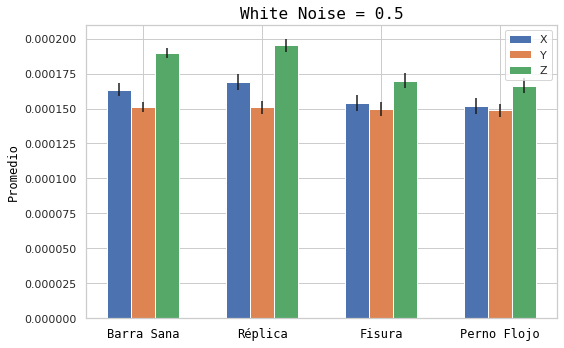

In [136]:
graficar_bar_grupal(wn05_XYZ_1, wn05_XYZ_2, wn05_XYZ_3, wn05_XYZ_4, font_title, font_label, "White Noise = 0.5")

In [137]:
wn1_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

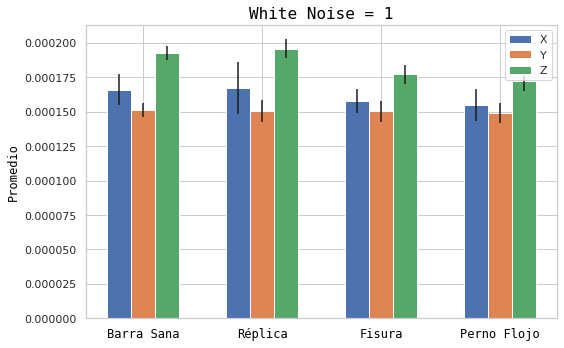

In [138]:
graficar_bar_grupal(wn1_XYZ_1, wn1_XYZ_2, wn1_XYZ_3, wn1_XYZ_4, font_title, font_label, "White Noise = 1")

In [139]:
wn2_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

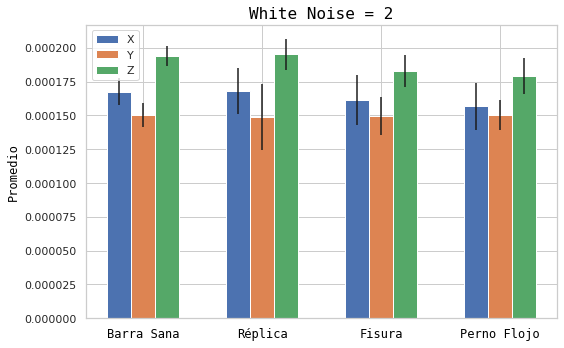

In [140]:
graficar_bar_grupal(wn2_XYZ_1, wn2_XYZ_2, wn2_XYZ_3, wn2_XYZ_4, font_title, font_label, "White Noise = 2")

In [141]:
wn3_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

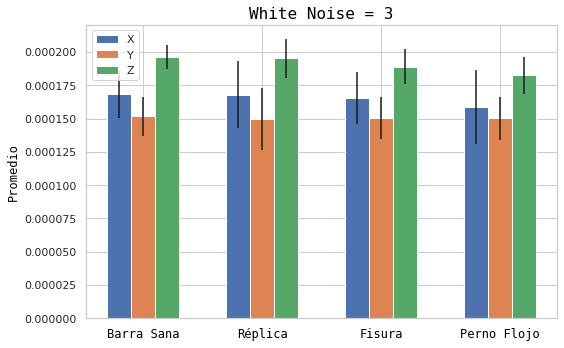

In [142]:
graficar_bar_grupal(wn3_XYZ_1, wn3_XYZ_2, wn3_XYZ_3, wn3_XYZ_4, font_title, font_label, "White Noise = 3")